# Yearly model

In [1]:
import torch
from torch import autograd, nn, optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Pre-process data

In [2]:
data = pd.read_csv('data.csv',sep=";")
data = data[431:]
display(data)
print(data['% FULL'].mean())

scaler1 = MinMaxScaler(feature_range=(-1, 1))
data['% FULL']=scaler1.fit_transform(data['% FULL'].values.reshape(-1, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))
data['Brent (eur/bbl)']=scaler2.fit_transform(data['Brent (eur/bbl)'].values.reshape(-1, 1))
scaler3 = MinMaxScaler(feature_range=(-1, 1))
data['Coal (eur/t)']=scaler3.fit_transform(data['Coal (eur/t)'].values.reshape(-1, 1))
scaler4 = MinMaxScaler(feature_range=(-1, 1))
data['CO2 (eur/t)']=scaler4.fit_transform(data['CO2 (eur/t)'].values.reshape(-1, 1))
scaler5 = MinMaxScaler(feature_range=(-1, 1))
data['month']=scaler5.fit_transform(data['month'].values.reshape(-1, 1))
scaler6 = MinMaxScaler(feature_range=(-1, 1))
data['JKM (Eur/mmbtu)']=scaler6.fit_transform(data['JKM (Eur/mmbtu)'].values.reshape(-1, 1))
scaler7 = MinMaxScaler(feature_range=(-1, 1))
data['Endex (eur/Mwh)']=scaler7.fit_transform(data['Endex (eur/Mwh)'].values.reshape(-1, 1))
scaler8 = MinMaxScaler(feature_range=(-1, 1))
data['AVG_TEMP']=scaler8.fit_transform(data['AVG_TEMP'].values.reshape(-1, 1))

data_train = data.iloc[:int(data.shape[0]*0.9)]
data_test = data.iloc[int(1+data.shape[0]*0.9):]
display(data_train)
data_train = shuffle(data_train)

X_train= torch.Tensor(data_train[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)','AVG_TEMP']].astype(np.float32).values)
y_train= torch.tensor(data_train['TTF (eur/Mwh)'].astype(np.float32).values)

X_test= torch.Tensor(data_test[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)','AVG_TEMP']].astype(np.float32).values)
y_test= torch.tensor(data_test['TTF (eur/Mwh)'].astype(np.float32).values)



,date,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,TTF (eur/Mwh)
431,4/01/2016,1,68.52,34.370671,6.334842,46.55,8.04,34.09,3.5,14.68
432,5/01/2016,1,67.95,33.891681,6.351200,46.10,7.99,34.13,2.0,14.70
433,6/01/2016,1,67.43,31.759139,6.313787,46.90,7.74,34.25,0.5,15.18
434,7/01/2016,1,66.88,30.867020,6.196269,47.50,7.54,34.86,-2.5,15.38
435,8/01/2016,1,66.39,30.698143,6.199103,46.10,7.41,33.93,0.5,14.57
436,11/01/2016,1,65.25,29.054241,6.239064,45.70,7.12,33.69,7.0,14.48
437,12/01/2016,1,64.84,28.431915,6.223512,45.00,7.10,32.65,5.0,14.05
438,13/01/2016,1,64.37,27.876391,6.198841,44.50,7.24,32.58,7.5,14.25
439,14/01/2016,1,63.79,28.562224,6.190169,44.35,7.08,32.00,6.0,13.82
440,19/01/2016,1,60.35,26.373223,5.029803,43.80,6.81,30.40,-1.0,13.70


58.161824907521584


/home/sweerts/anaconda3/envs/trading/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,date,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,TTF (eur/Mwh)
431,4/01/2016,-1.000000,0.382453,-0.646412,-0.145412,-0.874372,-0.617162,-0.590147,-0.344262,14.68
432,5/01/2016,-1.000000,0.366899,-0.665730,-0.140441,-0.889447,-0.621876,-0.588491,-0.442623,14.70
433,6/01/2016,-1.000000,0.352708,-0.751741,-0.151809,-0.862647,-0.645450,-0.583523,-0.540984,15.18
434,7/01/2016,-1.000000,0.337700,-0.787722,-0.187518,-0.842546,-0.664309,-0.558270,-0.737705,15.38
435,8/01/2016,-1.000000,0.324328,-0.794534,-0.186657,-0.889447,-0.676568,-0.596771,-0.540984,14.57
436,11/01/2016,-1.000000,0.293219,-0.860836,-0.174514,-0.902848,-0.703913,-0.606707,-0.114754,14.48
437,12/01/2016,-1.000000,0.282030,-0.885936,-0.179240,-0.926298,-0.705799,-0.649762,-0.245902,14.05
438,13/01/2016,-1.000000,0.269205,-0.908342,-0.186736,-0.943049,-0.692598,-0.652660,-0.081967,14.25
439,14/01/2016,-1.000000,0.253377,-0.880680,-0.189371,-0.948074,-0.707685,-0.676671,-0.180328,13.82
440,19/01/2016,-1.000000,0.159503,-0.968968,-0.541956,-0.966499,-0.733145,-0.742910,-0.639344,13.70


# Neural network

In [3]:
class Net(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size,hidden3_size, hidden4_size, hidden5_size, hidden6_size, hidden7_size,hidden8_size, hidden9_size, hidden10_size,hidden11_size,num_classes):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.drop1 = nn.Dropout(p=0.5)
        self.bn1 = nn.BatchNorm1d(hidden1_size)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.drop2 = nn.Dropout(p=0.5)
        self.bn2 = nn.BatchNorm1d(hidden2_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.drop3 = nn.Dropout(p=0.5)
        self.bn3 = nn.BatchNorm1d(hidden3_size)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(hidden3_size, hidden4_size)  
        self.drop4 = nn.Dropout(p=0.5)
        self.bn4 = nn.BatchNorm1d(hidden4_size)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(hidden4_size, hidden5_size)  
        self.drop5 = nn.Dropout(p=0.5)
        self.bn5 = nn.BatchNorm1d(hidden5_size)
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(hidden5_size, hidden6_size)
        self.drop6 = nn.Dropout(p=0.5)
        self.bn6 = nn.BatchNorm1d(hidden6_size)
        self.relu6 = nn.ReLU()
        
        self.fc7 = nn.Linear(hidden6_size, hidden7_size)
        self.drop7 = nn.Dropout(p=0.5)
        self.bn7 = nn.BatchNorm1d(hidden2_size)
        self.relu7 = nn.ReLU()
        
        self.fc8 = nn.Linear(hidden7_size, hidden8_size)
        self.drop8 = nn.Dropout(p=0.5)
        self.bn8 = nn.BatchNorm1d(hidden8_size)
        self.relu8 = nn.ReLU()
        
        self.fc9 = nn.Linear(hidden8_size, hidden9_size)  
        self.drop9 = nn.Dropout(p=0.5)
        self.bn9 = nn.BatchNorm1d(hidden9_size)
        self.relu9 = nn.ReLU()
        
        self.fc10 = nn.Linear(hidden9_size, hidden10_size)  
        self.drop10 = nn.Dropout(p=0.5)
        self.bn10 = nn.BatchNorm1d(hidden10_size)
        self.relu10 = nn.ReLU()
        
        self.fc11 = nn.Linear(hidden10_size, hidden11_size)  
        self.drop11 = nn.Dropout(p=0.5)
        self.bn11 = nn.BatchNorm1d(hidden11_size)
        self.relu11 = nn.ReLU()
        
        self.fc12 = nn.Linear(hidden11_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
#         out = self.drop1(out)
        out = self.relu1(out)
#         out= self.bn1(out)        
        
        out = self.fc2(out)
#         out = self.drop2(out)
        out = self.relu2(out)
#         out= self.bn2(out)         
        
        out = self.fc3(out)
#         out = self.drop3(out)
        out = self.relu3(out)
#         out= self.bn3(out)        
        
        out = self.fc4(out)
#         out = self.drop4(out)
        out = self.relu4(out)
#         out= self.bn4(out)        
        
        out = self.fc5(out)
#         out = self.drop5(out)
        out = self.relu5(out)
#         out= self.bn5(out)       

        out = self.fc6(out)
#         out = self.drop6(out)
        out = self.relu6(out)
#         out= self.bn6(out)        
        
        out = self.fc7(out)
#         out = self.drop7(out)
        out = self.relu7(out)
#         out= self.bn7(out)         
        
        out = self.fc8(out)
#         out = self.drop8(out)
        out = self.relu8(out)
#         out= self.bn8(out)        
        
        out = self.fc9(out)
#         out = self.drop9(out)
        out = self.relu9(out)
#         out= self.bn9(out)        
        
        out = self.fc10(out)
#         out = self.drop10(out)
        out = self.relu10(out)
#         out= self.bn10(out)  

        out = self.fc11(out)
#         out = self.drop10(out)
        out = self.relu11(out)
#         out= self.bn10(out)  
        
        out = self.fc12(out)
        return out

# Train it!

1 tensor(1.5411, device='cuda:1') tensor(7.9705, device='cuda:1', grad_fn=<MseLossBackward>)
1001 tensor(1.6083, device='cuda:1') tensor(7.8608, device='cuda:1', grad_fn=<MseLossBackward>)


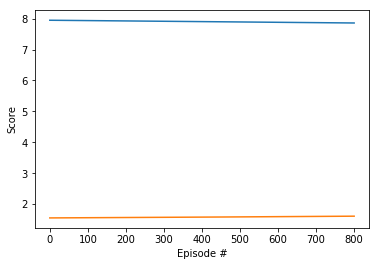

11.657573938369751


In [4]:
import time
start_time = time.time()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# device="cpu"
num_nodes = 16
net = Net(8,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,1).to(torch.device(device))  
net.train()
X_train = X_train.float().to(device)
y_train = y_train.float().to(device)
X_test = X_test.float().to(device)
y_test = y_test.float().to(device)


try:
    net.load_state_dict(torch.load('yearly_model_all.pth'))   
except:
    print("can't load model")
# learning_rate = 0.0000001
learning_rate = 0.000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

loss_train_arr = []
loss_test_arr = []

prev_loss = 100000000
curr_loss = 999
epoch = 0

# for epoch in range(2500):
while prev_loss >= curr_loss:
    
    #do the forward propagation
    out_train = net(X_train)
    out_test = net(X_test)

    # Out loss function
    loss_train = F.mse_loss(out_train.view(1, -1), y_train.float().view(1, -1))
    loss_train_arr.append(loss_train.data)
    loss_test = F.mse_loss(out_test.view(1, -1), y_test.float().view(1, -1)).data
    loss_test_arr.append(loss_test)
#     prev_loss = curr_loss
#     curr_loss = loss_test

    epoch = epoch + 1
    if epoch % 1000 == 1:
        print(epoch, loss_test,loss_train)
        torch.save(net.state_dict(),'yearly_model_all.pth')
        prev_loss = curr_loss
        curr_loss = loss_test
    # Our optimizer
    
    #optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

    #do back propagation
    opt.zero_grad()
    loss_train.backward()
    
    torch.nn.utils.clip_grad_norm_(net.parameters(), 0.00001)
    torch.nn.utils.clip_grad_norm_(net.parameters(), 0.00001)     

    opt.step()

torch.save(net.state_dict(),'yearly_model_all.pth')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[200:])), loss_train_arr[200:],label="train")
plt.plot(np.arange(len(loss_test_arr[200:])), loss_test_arr[200:],label="test")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[2000:2500])), loss_train_arr[2000:2500])
plt.plot(np.arange(len(loss_test_arr[2000:2500])), loss_test_arr[2000:2500])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

# Test it!

In [ ]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
num_nodes = 32
net = Net(7,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,1).to(torch.device(device))  
try:
    net.load_state_dict(torch.load('yearly_model_all.pth'))
    net.eval()
except:
    print("can't load model")
learning_rate = 0.0000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

X_test = X_test.float().to(device)  
out = net(X_test).data
out = out.cpu().data.numpy()
print(out)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(out)), out)
plt.plot(np.arange(len(out), y_test.data.numpy()))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Use it!

,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,current TTF_forward
0,6,66.143875,62.252762,5.058093,63.35,25.13,43.19,14.939560,14.566
1,7,76.814960,61.666059,5.266994,64.90,25.14,42.58,18.146067,14.688
2,8,88.021452,60.522381,5.386510,66.85,25.17,48.50,17.863636,14.938
3,9,96.625125,59.656315,5.931612,68.80,25.20,53.24,16.028846,15.713
4,10,101.231129,58.821493,6.567448,69.85,25.30,55.11,12.274436,17.795
5,11,99.582292,57.618885,7.128856,70.50,25.35,55.90,8.689189,20.490
6,12,88.595645,56.510417,7.329469,71.20,25.41,56.20,6.783654,21.035
7,1,75.357097,55.513182,7.295639,72.00,25.47,56.90,4.069565,21.130
8,2,59.192845,55.272757,6.590947,72.55,25.60,55.33,4.152381,21.180
9,3,48.391089,55.015752,5.803349,72.40,25.83,49.75,5.921296,20.759


,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,current TTF_forward,predicted TTF,market premium
0,6,66.143875,62.252762,5.058093,63.35,25.13,43.19,14.939560,14.566,17.359018,-2.793018
1,7,76.814960,61.666059,5.266994,64.90,25.14,42.58,18.146067,14.688,17.359531,-2.671531
2,8,88.021452,60.522381,5.386510,66.85,25.17,48.50,17.863636,14.938,17.979898,-3.041898
3,9,96.625125,59.656315,5.931612,68.80,25.20,53.24,16.028846,15.713,19.166529,-3.453529
4,10,101.231129,58.821493,6.567448,69.85,25.30,55.11,12.274436,17.795,20.241978,-2.446978
5,11,99.582292,57.618885,7.128856,70.50,25.35,55.90,8.689189,20.490,21.065987,-0.575987
6,12,88.595645,56.510417,7.329469,71.20,25.41,56.20,6.783654,21.035,21.284592,-0.249592
7,1,75.357097,55.513182,7.295639,72.00,25.47,56.90,4.069565,21.130,20.199177,0.930823
8,2,59.192845,55.272757,6.590947,72.55,25.60,55.33,4.152381,21.180,19.870279,1.309721
9,3,48.391089,55.015752,5.803349,72.40,25.83,49.75,5.921296,20.759,18.975256,1.783744


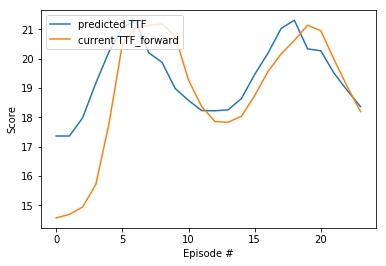

In [5]:
cases = pd.read_csv('Cases.csv',sep=";")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
display(cases)
net = Net(8,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,1).to(torch.device(device))  
net.load_state_dict(torch.load('yearly_model_all.pth'))
net.eval()

TTF_pred = []
market_premium = []


for i in range(0,cases.shape[0]):    
    columns = ['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)','AVG_TEMP']
    X_use = pd.DataFrame(columns=columns)    
    X_use['month'] = [cases["month"].iloc[i]]
    X_use["% FULL"] = [cases["% FULL"].iloc[i]]
    X_use['Brent (eur/bbl)'] = [cases['Brent (eur/bbl)'].iloc[i]]
    X_use['Coal (eur/t)'] = [cases['Coal (eur/t)'].iloc[i]]
    X_use['CO2 (eur/t)'] = [cases['CO2 (eur/t)'].iloc[i]]
    X_use['JKM (Eur/mmbtu)'] = [cases['JKM (Eur/mmbtu)'].iloc[i]]
    X_use['Endex (eur/Mwh)'] = [cases['Endex (eur/Mwh)'].iloc[i]]
    X_use['AVG_TEMP'] = [cases['AVG_TEMP'].iloc[i]]

    X_use['% FULL']=scaler1.transform(X_use['% FULL'].values.reshape(-1, 1))
    X_use['Brent (eur/bbl)']=scaler2.transform(X_use['Brent (eur/bbl)'].values.reshape(-1, 1))
    X_use['Coal (eur/t)']=scaler3.transform(X_use['Coal (eur/t)'].values.reshape(-1, 1))
    X_use['CO2 (eur/t)']=scaler4.transform(X_use['CO2 (eur/t)'].values.reshape(-1, 1))
    X_use['month'] = scaler5.transform(X_use['month'].values.reshape(-1, 1))
    X_use['JKM (Eur/mmbtu)'] = scaler6.transform(X_use['JKM (Eur/mmbtu)'].values.reshape(-1, 1))
    X_use['Endex (eur/Mwh)'] = scaler7.transform(X_use['Endex (eur/Mwh)'].values.reshape(-1, 1))
    X_use['AVG_TEMP'] = scaler8.transform(X_use['AVG_TEMP'].values.reshape(-1, 1))

    X_use= torch.Tensor(X_use.astype(np.float32).values)
    X_use = X_use.float().to(device) 
    out = net(X_use).data
    out = out.cpu().data.numpy()
    TTF_pred.append(out[0][0])
    market_premium.append(cases["current TTF_forward"].iloc[i] - out[0][0])
    #print("predicted price: ",out[0][0])
    
cases["predicted TTF"] = TTF_pred
cases["market premium"] = market_premium
display(cases)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(cases["predicted TTF"])), cases["predicted TTF"],label='predicted TTF')
plt.plot(np.arange(len(cases["current TTF_forward"])), cases["current TTF_forward"],label='current TTF_forward')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()